**Huge credit goes to Rajanand Ilangovan for his insightful, detailed dataset. **

**This kernel is to explore some of the datasets and visualize any patterns.**

*Comments and suggestions for improvement are definitely welcome as this kernel is a learning exercise for me.*

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

10_Property_stolen_and_recovered.csv
20_Victims_of_rape.csv
25_Complaints_against_police.csv
28_Trial_of_violent_crimes_by_courts.csv
29_Period_of_trials_by_courts.csv
30_Auto_theft.csv
31_Serious_fraud.csv
32_Murder_victim_age_sex.csv
33_CH_not_murder_victim_age_sex.csv
35_Human_rights_violation_by_police.csv
36_Police_housing.csv
39_Specific_purpose_of_kidnapping_and_abduction.csv
40_01_Custodial_death_person_remanded.csv
40_02_Custodial_death_person_not_remanded.csv
40_03_Custodial_death_during_production.csv
40_04_Custodial_death_during_hospitalization_or_treatment.csv
40_05_Custodial_death_others.csv
42_Cases_under_crime_against_women.csv
43_Arrests_under_crime_against_women.csv
crime



First we'll focus on the gruesome crime of rape in my state of Maharashtra.


In [2]:
vic_rape_df = pd.read_csv("../input/20_Victims_of_rape.csv")
#Exploring first few rows of 'Victims of Rape' dataset
vic_rape_df.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


[]

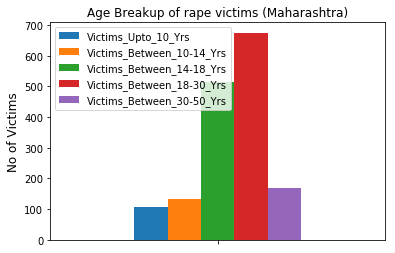

In [3]:
#Selecting data for Maharashtra, for the latest year available - 2010

mah_vic=vic_rape_df.loc[vic_rape_df['Area_Name']=='Maharashtra']
mah_vic_2010_total = mah_vic [(mah_vic['Year']==2010) & (mah_vic['Subgroup']=='Total Rape Victims')]

#Plotting age breakup of victims
ax = mah_vic_2010_total[['Victims_Upto_10_Yrs','Victims_Between_10-14_Yrs','Victims_Between_14-18_Yrs','Victims_Between_18-30_Yrs','Victims_Between_30-50_Yrs']].plot(kind='bar',legend=True, title = 'Age Breakup of rape victims (Maharashtra)')
ax.set_ylabel("No of Victims", fontsize=12)
ax.set_xticklabels([])




Plotting age breakup of victims of incest rape. Naturally, the victims are younger (almost double in 10-14 age group) and very few in 30-50 age group.

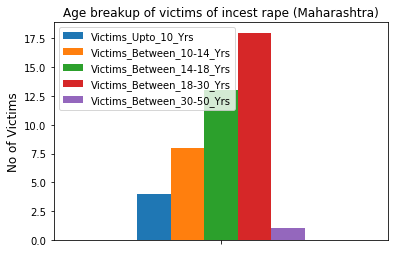

In [4]:
#Selecting data on incest rape in Maharashtra
mah_vic_2010_inc = mah_vic [(mah_vic['Year']==2010) & (mah_vic['Subgroup']=='Victims of Incest Rape')]

#Plotting age breakup of victims of incest rape
ax = mah_vic_2010_inc[['Victims_Upto_10_Yrs','Victims_Between_10-14_Yrs','Victims_Between_14-18_Yrs','Victims_Between_18-30_Yrs','Victims_Between_30-50_Yrs']].plot(kind='bar',title = 'Age breakup of victims of incest rape (Maharashtra)',legend=True)
ax.set_ylabel("No of Victims", fontsize=12)
ax.set_xticklabels([''])


The total number of rape cases reported in Maharashtra from 2001-2010: 

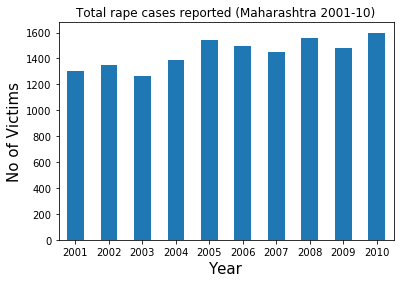

In [5]:
mah_vic_total = mah_vic.loc[mah_vic['Subgroup']=='Total Rape Victims']
ax = mah_vic_total['Rape_Cases_Reported'].plot(kind='bar', title = 'Total rape cases reported (Maharashtra 2001-10)')
ax.set_xlabel("Year", fontsize=15)
ax.set_ylabel("No of Victims", fontsize=15)
ax.set_xticklabels(mah_vic_total['Year'],rotation='horizontal')


The total number of rape victims per state for the year 2010. 

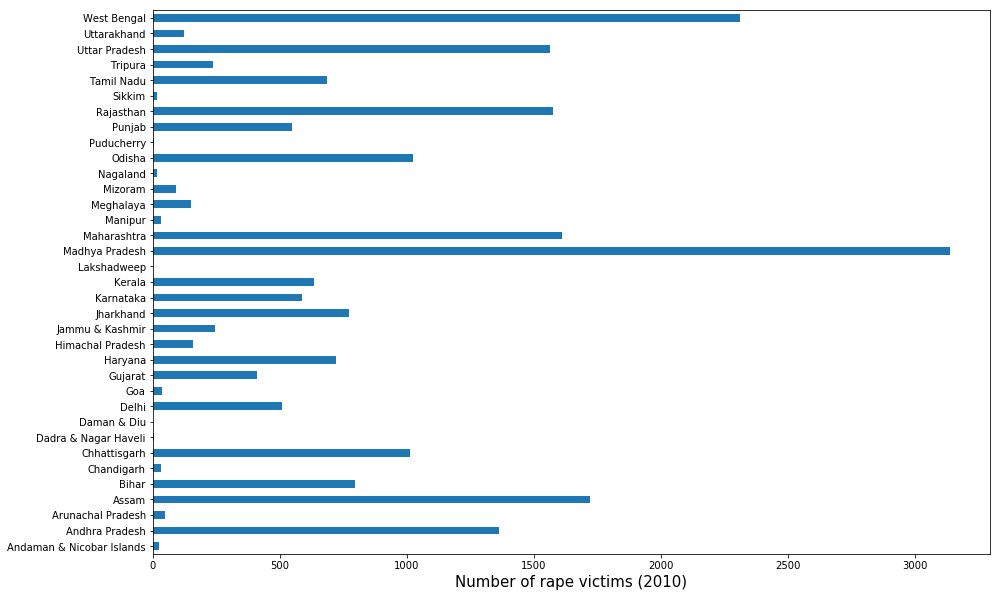

In [6]:
vic_rape_2010_total = vic_rape_df[(vic_rape_df['Year']==2010) & (vic_rape_df['Subgroup']== 'Total Rape Victims')]
ax1 = vic_rape_2010_total['Victims_of_Rape_Total'].plot(kind='barh',figsize=(15, 10))
ax1.set_xlabel("Number of rape victims (2010)", fontsize=15)
ax1.set_yticklabels(vic_rape_2010_total['Area_Name'])


Let's compare the total number of rape victims per state for the year 2001 (oldest year in dataset) and 2010 (latest year in the dataset).

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-pac

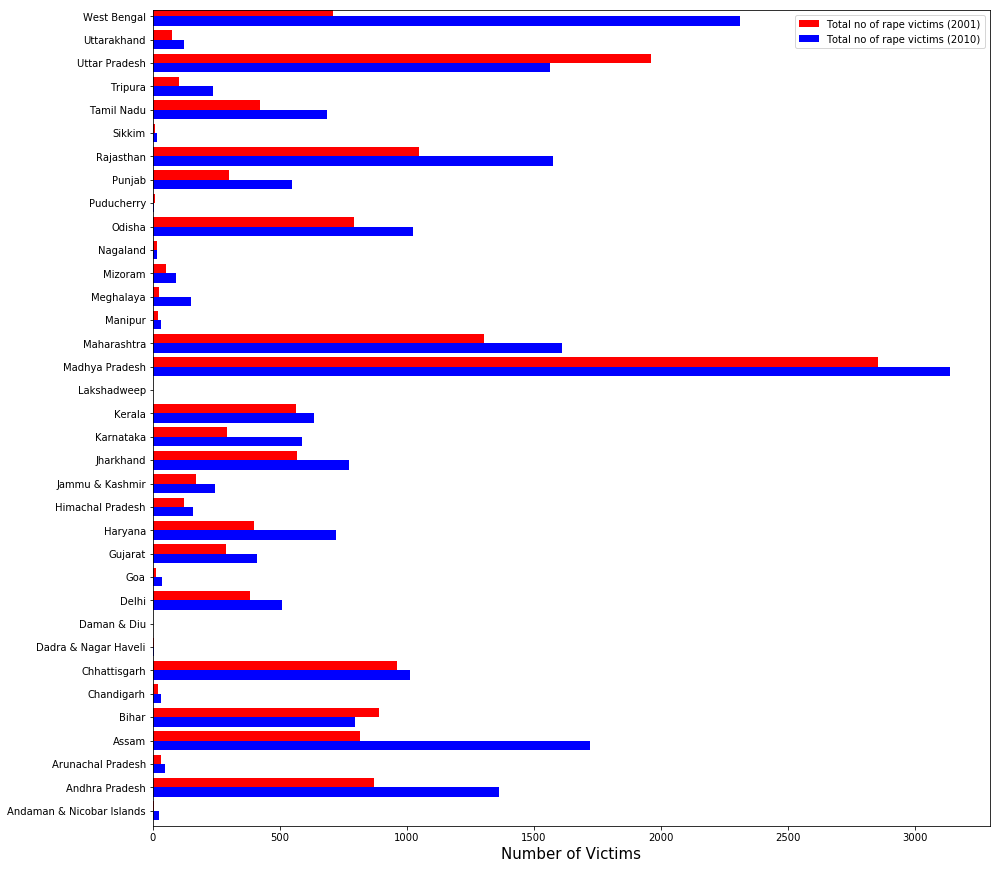

In [7]:
vic_rape_2001_total = vic_rape_df[(vic_rape_df['Year']==2001) & (vic_rape_df['Subgroup']== 'Total Rape Victims')]
df1 = vic_rape_2001_total[['Area_Name','Victims_of_Rape_Total']]
df2 = vic_rape_2010_total[['Area_Name','Victims_of_Rape_Total']]

#Renaming column name in order to differentiate by year
df1 ['Total no of rape victims (2001)'] = df1 ['Victims_of_Rape_Total']
df2 ['Total no of rape victims (2010)'] = df2 ['Victims_of_Rape_Total']
df1.drop(['Victims_of_Rape_Total'], axis = 1, inplace = True)
df2.drop(['Victims_of_Rape_Total'], axis = 1, inplace = True)
fig = plt.figure()
ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.4

df1.plot(kind='barh', color='red', ax=ax, width=width, position=0,figsize=(15,15))
df2.plot(kind='barh', color='blue', ax=ax, width=width, position=1,figsize=(15,15))
ax.set_xlabel("Number of Victims", fontsize=15)
ax.set_yticklabels(df1['Area_Name'])

plt.show()

Exploring murder data. 
Plotting age breakup of male and female murder victims in Maharashtra.
Lots of younger female victims when compared to male victims.

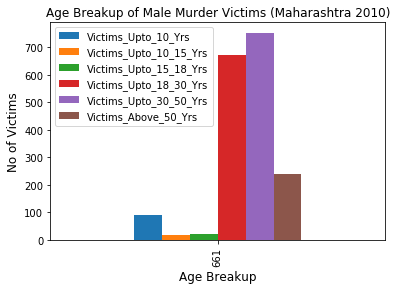

In [8]:
murder_df = pd.read_csv("../input/32_Murder_victim_age_sex.csv")
mah_murder_df=murder_df.loc[murder_df['Area_Name']=='Maharashtra']
mah_murder_2010_total = mah_murder_df [(mah_murder_df['Year']==2010) & (mah_murder_df['Sub_Group_Name']=='1. Male Victims')]
ax = mah_murder_2010_total [['Victims_Upto_10_Yrs','Victims_Upto_10_15_Yrs','Victims_Upto_15_18_Yrs','Victims_Upto_18_30_Yrs','Victims_Upto_30_50_Yrs','Victims_Above_50_Yrs']].plot(kind='bar',title='Age Breakup of Male Murder Victims (Maharashtra 2010)',legend=True)
ax.set_xlabel("Age Breakup", fontsize=12)
ax.set_ylabel("No of Victims", fontsize=12)
#murder_df.head()

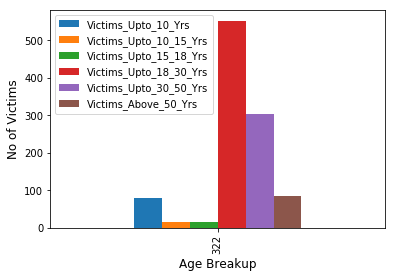

In [9]:
mah_murder_2010_total = mah_murder_df [(mah_murder_df['Year']==2010) & (mah_murder_df['Sub_Group_Name']=='2. Female Victims')]
ax = mah_murder_2010_total [['Victims_Upto_10_Yrs','Victims_Upto_10_15_Yrs','Victims_Upto_15_18_Yrs','Victims_Upto_18_30_Yrs','Victims_Upto_30_50_Yrs','Victims_Above_50_Yrs']].plot(kind='bar',legend=True)
ax.set_xlabel("Age Breakup", fontsize=12)
ax.set_ylabel("No of Victims", fontsize=12)


Comparison of total murder victims across states for years 2001 & 2010.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/opt/conda/lib/python3.6/site-

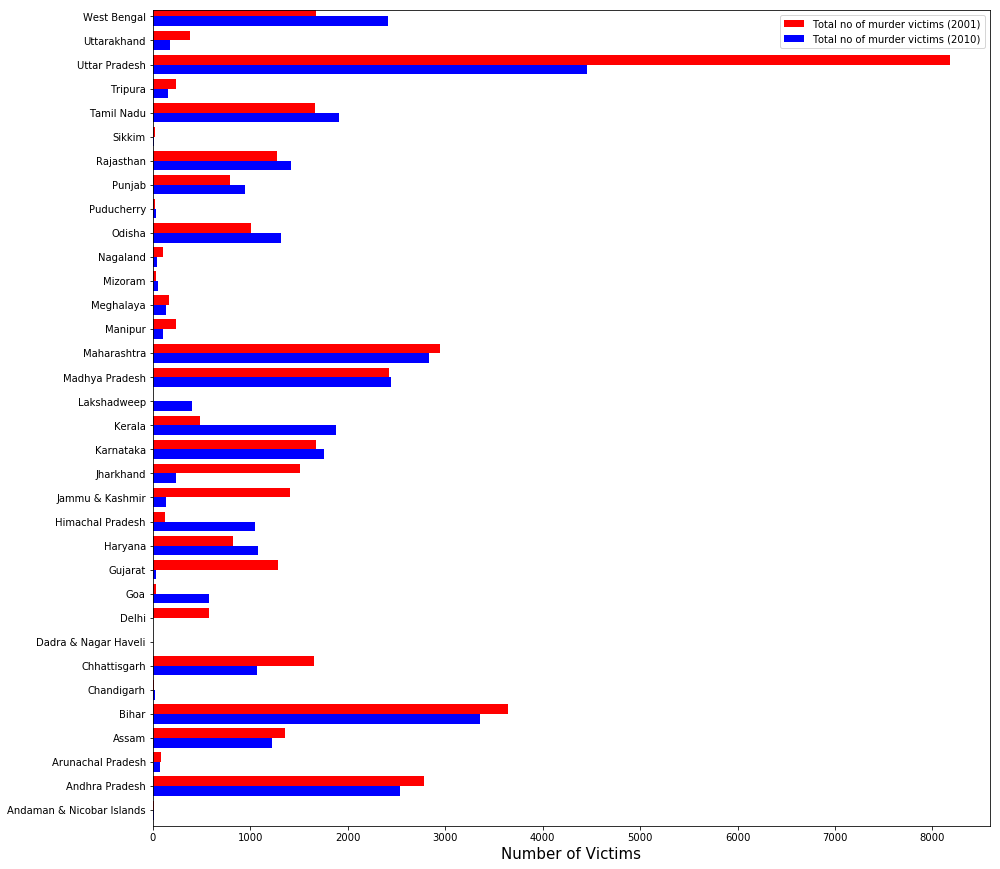

In [10]:
vic_murd_2001_total = murder_df[(murder_df['Year']==2001) & (murder_df['Sub_Group_Name']== '3. Total')]
vic_murd_2010_total = murder_df[(murder_df['Year']==2010) & (murder_df['Sub_Group_Name']== '3. Total')]
df1 = vic_murd_2001_total[['Area_Name','Victims_Total']]
df2 = vic_murd_2010_total[['Area_Name','Victims_Total']]
df1 ['Total no of murder victims (2001)'] = df1 ['Victims_Total']
df2 ['Total no of murder victims (2010)'] = df2 ['Victims_Total']
df1.drop(['Victims_Total'], axis = 1, inplace = True)
df2.drop(['Victims_Total'], axis = 1, inplace = True)
fig = plt.figure()
ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.4

df1.plot(kind='barh', color='red', ax=ax, width=width, position=0,figsize=(15,15))
df2.plot(kind='barh', color='blue', ax=ax, width=width, position=1,figsize=(15,15))
ax.set_xlabel("Number of Victims", fontsize=15)
ax.set_yticklabels(df1['Area_Name'])

plt.show()

Lastly, visualizing the different categories of cases under crime against women for the year 2010 in Maharashtra.
Surprisingly, crimes by husband and relatives are the highest category, even more than molestation.

In [11]:
cases_women_df = pd.read_csv("../input/42_Cases_under_crime_against_women.csv",error_bad_lines=False)
cases_women_df.head()

b'Skipping line 2452: expected 22 fields, saw 23\nSkipping line 2453: expected 22 fields, saw 23\nSkipping line 2454: expected 22 fields, saw 23\nSkipping line 2455: expected 22 fields, saw 23\nSkipping line 2456: expected 22 fields, saw 23\nSkipping line 2457: expected 22 fields, saw 23\nSkipping line 2458: expected 22 fields, saw 23\nSkipping line 2459: expected 22 fields, saw 23\nSkipping line 2460: expected 22 fields, saw 23\nSkipping line 2461: expected 22 fields, saw 23\nSkipping line 2462: expected 22 fields, saw 23\nSkipping line 2463: expected 22 fields, saw 23\nSkipping line 2464: expected 22 fields, saw 23\nSkipping line 2465: expected 22 fields, saw 23\nSkipping line 2466: expected 22 fields, saw 23\nSkipping line 2467: expected 22 fields, saw 23\nSkipping line 2468: expected 22 fields, saw 23\nSkipping line 2469: expected 22 fields, saw 23\nSkipping line 2470: expected 22 fields, saw 23\nSkipping line 2471: expected 22 fields, saw 23\nSkipping line 2472: expected 22 fields

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Acquitted_or_Discharged,Cases_charge_sheets_were_not_laid_but_Final_Report_submitted,Cases_Chargesheeted,Cases_Compounded_or_Withdrawn,Cases_Convicted,Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law,...,Cases_Pending_Investigation_at_Year_End,Cases_Pending_Investigation_from_previous_year,Cases_Pending_Trial_at_Year_End,Cases_Pending_Trial_from_the_previous_year,Cases_Reported,Cases_Sent_for_Trial,Cases_Trials_Completed,Cases_Withdrawn_by_the_Govt,Cases_withdrawn_by_the_Govt_during_investigation,Total_Cases_for_Trial
0,Andaman & Nicobar Islands,2001,Rape,01. Rape,5,2,3,0,0,0,...,1,3,34,36,3,3,5,0,0,39
1,Andhra Pradesh,2001,Rape,01. Rape,731,22,769,35,197,74,...,393,390,1974,2170,871,769,928,2,0,2937
2,Arunachal Pradesh,2001,Rape,01. Rape,1,2,25,0,2,0,...,18,12,282,260,33,25,3,0,0,285
3,Assam,2001,Rape,01. Rape,334,95,495,10,101,45,...,1045,863,1964,1914,817,495,435,0,0,2409
4,Bihar,2001,Rape,01. Rape,406,141,685,0,155,105,...,488,531,3185,3061,888,685,561,0,0,3746


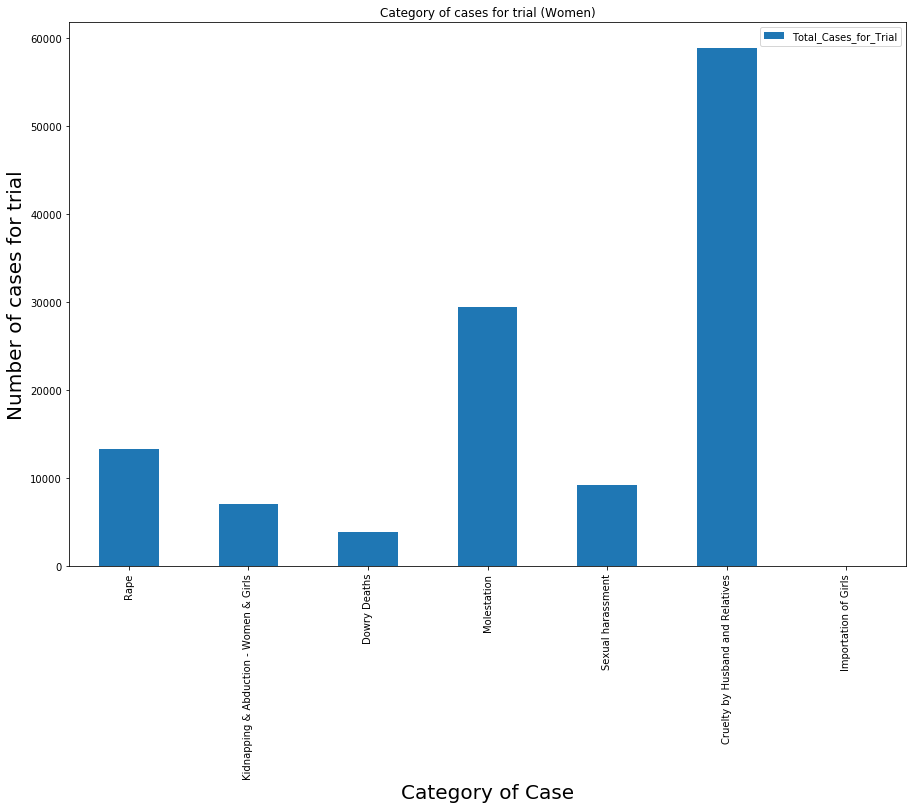

In [12]:
df_cas_wom = cases_women_df.loc[cases_women_df['Year'] == 2010]
#df_cas_wom.head()
mah_cas_wom = df_cas_wom[(df_cas_wom['Area_Name'] == 'Maharashtra') & (df_cas_wom['Year']==2010)]
#mah_cas_wom.columns.values
df = mah_cas_wom[mah_cas_wom.Group_Name != 'Total Crime Against Women']
ax = df[['Group_Name','Total_Cases_for_Trial']].plot(kind='bar', legend = True, title = "Category of cases for trial (Women)",figsize = (15,10))
ax.set_xticklabels(mah_cas_wom['Group_Name'])
ax.set_xlabel('Category of Case', fontsize = 20)
ax.set_ylabel('Number of cases for trial', fontsize = 20)
plt.show()